In [1]:
from src.metadata import count as count_method, frequency, sort_by_value, map_to_polish_names, files_stats, sort_by_key
from src.datasets import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
DATA_PATH = 'data/'
data_sets = load(DATA_PATH)

### Cześtość występowania

In [2]:
freqs = frequency(data_sets)
freqs = map_to_polish_names(freqs)
freqs = sort_by_value(freqs, reverse=True)
counts = count_method(data_sets)
counts = map_to_polish_names(counts)
counts = sort_by_value(counts, reverse=True)

meta_stats = []
for item in zip(counts, freqs):
    count, freq = item
    attribute, count = count
    attribute, freq = freq
    freq = freq * 100
    meta_stats.append([attribute, count, freq])

columns = ['Atrybut', 'Liczba wystąpień', 'Procent wystąpień']
df = pd.DataFrame(data=meta_stats, columns=columns)
display(df)

,Atrybut,Liczba wystąpień,Procent wystąpień
0,temat,150,100.0
1,czynsz,131,87.3
2,ulica,126,84.0
3,rachunki,121,80.7
4,liczba pokojów,100,66.7
5,kaucja,75,50.0
6,osiedle,51,34.0
7,liczba współlokatorów,50,33.3
8,płeć współlokatorów,42,28.0
9,zawód współlokatorów,31,20.7


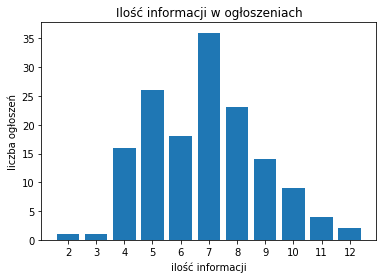

In [3]:
fs = files_stats(data_sets)
fs = sort_by_key(fs)
l = []
for key, value in fs:
    l.append((key, value))

x_values = [key for key, value in fs]
bars_count = np.arange(len(x_values))
y_values = [value for key, value in fs]
 
plt.bar(bars_count, y_values, align='center')
plt.xticks(bars_count, x_values)
plt.ylabel('liczba ogłoszeń')
plt.xlabel('ilość informacji')
plt.title('Ilość informacji w ogłoszeniach')

#plt.savefig(f"plots/informacje_w_danych", format='eps')
plt.show()